In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np

import hphc9
import hphc10

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

%matplotlib inline

In [29]:
(C**3)/( G*(25+10)*Mo*np.pi*6**(3/2) )

125.60042962682857

In [2]:
sampling_frequency = 1024.0
duration = 4.0

In [3]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    minimum_f = 20.0
    mass_diff = (mass_1-mass_2)*Mo
    
    foo = np.array(frequency_array_)
    N = len(foo)
    h_plus = np.zeros(N)*1j
    h_cross = np.zeros(N)*1j

    mask_3 = np.logical_and(foo >= minimum_f, foo <= maximum_f)
    index = np.array(np.where(mask_3)).flatten()
    
    for k in index:
        arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , \
                    'f_':foo[k], 'f0_':20.0, 'et0_':eccentricity, 'phic_':phase, \
                    'tc_':geocent_time, 'M_':total_mass, 'eta_':symmetric_mass_ratio, \
                    'ff_':maximum_f, 'delta_':mass_diff}

        fplus = hphc10.Fn(**arg_plus)

        h_plus[k] = fplus.htilde()[0]
        h_cross[k] = fplus.htilde()[1]

    #return {'plus': h_plus, 'cross': h_cross}
    return {'plus': h_plus, 'cross': h_cross}

In [89]:
eccentric_waveform([105],13.488088173501811,0.4,0.1,200.0,0.4,0.1,1.2,1180002601.0,45,5.73)

{'plus': array([-8.87816569e-24-8.71373268e-24j]),
 'cross': array([8.6866884e-24-8.85029318e-24j])}

In [95]:
import time 

fff = np.arange(0.0,512.0,0.25)
t0 = time.time()
zz = eccentric_waveform(fff,28.19,0.86,0.1,440.0,0.4,0.1,1.2,1180002601.0,45,5.73)

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 18.0161


In [110]:
foo = np.array([1,2,3,4])
mask_3 = foo>2
np.where(mask_3)

(array([2, 3]),)

In [111]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    minimum_f = 20.0
    mass_diff = (mass_1-mass_2)*Mo
    
    foo = np.array(frequency_array_)
    N = len(foo)
    h_plus = np.zeros(N)*1j
    h_cross = np.zeros(N)*1j

    mask_3 = foo >= minimum_f
    index = np.array(np.where(mask_3)).flatten()
    
    for k in index:
        arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , \
                    'f_':foo[k], 'f0_':20.0, 'et0_':eccentricity, 'phic_':phase, \
                    'tc_':geocent_time, 'M_':total_mass, 'eta_':symmetric_mass_ratio, \
                    'ff_':maximum_f, 'delta_':mass_diff}

        fplus = hphc10.Fn(**arg_plus)

        h_plus[k] = fplus.htilde()[0]
        h_cross[k] = fplus.htilde()[1]

    #return {'plus': h_plus, 'cross': h_cross}
    return {'plus': h_plus, 'cross': h_cross}

In [112]:
eccentric_waveform([105],13.488088173501811,0.20408163265306123,0.1,200.0,0.4,0.1,1.2,1180002601.0,45,5.73)

{'plus': array([1.46901437e-25+1.33803553e-24j]),
 'cross': array([-1.3335753e-24+1.46080796e-25j])}

In [34]:
items = ((d,28.19,0.86,0.1,440.0,0.4,0.1,1.2,1180002601.0,45,5.73) for d in fff)
argg = list(items)

In [50]:
np.array(result)[:,1]

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [99]:
import time 

fff = np.arange(0.0,512.0,0.25)
t0 = time.time()
zz = eccentric_waveform(fff,28.19,0.86,0.1,440.0,0.4,0.1,1.2,1180002601.0,45,5.73)

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 19.4486


In [83]:
#chirp mass
m1=25
m2=10
((m1*m2)**(3/5))/((m1+m2)**(1/5))

13.488088173501811

In [85]:
#mass ratio
m2/m1

0.4

In [4]:
#injection_parameters = dict(mass_1=25.0, mass_2=10.0, eccentricity=0.1, luminosity_distance=200.0, theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)
injection_parameters = dict(chirp_mass=13.488088173501811, mass_ratio=0.4, eccentricity=0.1, luminosity_distance=200.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45.0, dec=5.73)

In [5]:
# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform)

23:19 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [6]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
injection = ifos.inject_signal(
    waveform_generator=waveform_generator,
    parameters=injection_parameters)

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
23:23 bilby INFO    : Injected signal in H1:
23:23 bilby INFO    :   optimal SNR = 71.90
23:23 bilby INFO    :   matched filter SNR = 72.27-0.00j
23:23 bilby INFO    :   chirp_mass = 13.488088173501811
23:23 bilby INFO    :   mass_ratio = 0.4
23:23 bilby INFO    :   eccentricity = 0.1
23:23 bilby INFO    :   luminosity_distance = 200.0
23:23 bilby INFO    :   theta_jn = 0.4
23:23 bilby INFO    :   psi = 0.1
23:23 bilby INFO    :   phase = 1.2
23:23 bilby INFO    :   geocent_time = 1180002601.0
23:23 bilby INFO    :   ra = 45.0
23:23 bilby INFO    :   dec = 5.73
23:23 bilby INFO    : Injected signal in L1:
23:23 bilby INFO    :   optimal SNR = 42.28
23:23 bilby INFO    :   matched filter SNR = 43.08+0.09j
23:23 bilby INFO

In [ ]:
# Set up interferometers.
#maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
minimum_frequency = 20.0+5.0
MM1 = 25.0
MM2 = 10.0
maximum_frequency = (C**3)/( G*(MM1+MM2)*Mo*np.pi*6**(3/2) )-5.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)


16:42 bilby INFO    : Injected signal in H1:
16:42 bilby INFO    :   optimal SNR = 69.76
16:42 bilby INFO    :   matched filter SNR = 139.34-0.14j
16:42 bilby INFO    :   chirp_mass = 13.488088173501811
16:42 bilby INFO    :   mass_ratio = 0.4
16:42 bilby INFO    :   eccentricity = 0.1
16:42 bilby INFO    :   luminosity_distance = 200.0
16:42 bilby INFO    :   theta_jn = 0.4
16:42 bilby INFO    :   psi = 0.1
16:42 bilby INFO    :   phase = 1.2
16:42 bilby INFO    :   geocent_time = 1180002601.0
16:42 bilby INFO    :   ra = 45.0
16:42 bilby INFO    :   dec = 5.73
16:42 bilby INFO    : Injected signal in L1:
16:42 bilby INFO    :   optimal SNR = 41.03
16:42 bilby INFO    :   matched filter SNR = 80.85-1.06j
16:42 bilby INFO    :   chirp_mass = 13.488088173501811
16:42 bilby INFO    :   mass_ratio = 0.4
16:42 bilby INFO    :   eccentricity = 0.1
16:42 bilby INFO    :   luminosity_distance = 200.0
16:42 bilby INFO    :   theta_jn = 0.4
16:42 bilby INFO    :   psi = 0.1
16:42 bilby INFO    

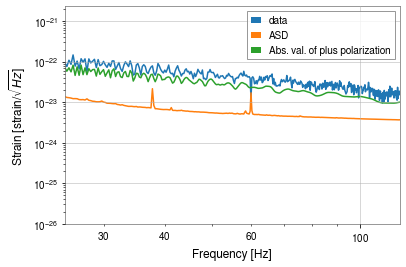

In [93]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["cross"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [14]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.core.prior.Uniform(name='chirp_mass', minimum=25.0,maximum=30.0)
prior['mass_ratio'] = bilby.core.prior.Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['eccentricity'] = bilby.core.prior.LogUniform(
    name='eccentricity', minimum=1e-4, maximum=0.4)

prior["luminosity_distance"] = 440.0
prior["theta_jn"] = 0.4
prior["psi"] = 0.1
prior["phase"] = 1.2
prior["geocent_time"] = 1180002601.0
prior["ra"] = 45.0
prior["dec"] = 5.73

In [15]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator, priors=prior,
    time_marginalization=False, phase_marginalization=False, distance_marginalization=False)

In [ ]:
result_short = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='short', label="eccn",
    nlive=500, dlogz=3, npool=16,  # <- Arguments are used to make things fast - not recommended for general use
    clean=True
)

14:29 bilby INFO    : Running for label 'eccn', output will be saved to 'short'
14:29 bilby INFO    : Using lal version 6.21.0
14:29 bilby INFO    : Using lal git version Branch: None;Tag: lal-v6.21.0;Id: 37caf89936b637993c30b3076fe4b853311873ee;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
14:29 bilby INFO    : Using lalsimulation version 1.10.0
14:29 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v1.10.0;Id: 5bfe091197594d55cf634f8a1c004eb9dc9b6459;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
14:29 bilby INFO    : Search parameters:
14:29 bilby INFO    :   chirp_mass = Uniform(minimum=25.0, maximum=30.0, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
14:29 bilby INFO    :   mass_ratio = Uniform(minimum=0.5, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
14:29 bilby INFO    :   eccentricity =

0it [00:00, ?it/s]

14:47 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 16, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f7255370a90>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
14:47 bilby INFO    : Checkpoint every check_point_delta_t = 600s
14:47 bilby INFO    : Using dynesty version 1.0.1
14:47 bilby INFO    : Generating initial points from the prio

528it [1:46:36,  3.84s/it, bound:0 nc:  2 ncall:1.5e+03 eff:35.3% logz-ratio=543.33+/-0.18 dlogz:3260.008>3]   

16:33 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
16:33 bilby WARNING : Axis limits cannot be NaN or Inf
16:33 bilby WARNING : Failed to create dynesty run plot at checkpoint


795it [2:07:27,  6.63s/it, bound:0 nc:  2 ncall:2.5e+03 eff:31.8% logz-ratio=1925.31+/-0.18 dlogz:1876.409>3]

16:54 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
16:54 bilby WARNING : Axis limits cannot be NaN or Inf
16:54 bilby WARNING : Failed to create dynesty run plot at checkpoint


958it [2:28:54,  9.15s/it, bound:0 nc: 11 ncall:3.5e+03 eff:27.4% logz-ratio=2492.46+/-0.18 dlogz:1314.904>3]

17:16 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
17:16 bilby WARNING : Axis limits cannot be NaN or Inf
17:16 bilby WARNING : Failed to create dynesty run plot at checkpoint


1092it [2:51:36, 22.02s/it, bound:0 nc: 27 ncall:4.5e+03 eff:24.1% logz-ratio=2819.03+/-0.17 dlogz:997.900>3] 

17:38 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
17:38 bilby WARNING : Axis limits cannot be NaN or Inf
17:38 bilby WARNING : Failed to create dynesty run plot at checkpoint


1189it [3:13:35, 27.30s/it, bound:0 nc:  8 ncall:5.5e+03 eff:21.5% logz-ratio=3032.31+/-0.17 dlogz:805.942>3]

18:00 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:675: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([0., max(y0) * 1.05])
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
18:00 bilby WARNING : Axis limits cannot be NaN or Inf
18:00 bilby WARNING : Failed to create dynesty run plot at checkpoint


1271it [3:36:06, 23.55s/it, bound:0 nc: 28 ncall:6.6e+03 eff:19.4% logz-ratio=3180.38+/-0.19 dlogz:662.804>3]

18:23 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
18:23 bilby WARNING : Axis limits cannot be NaN or Inf
18:23 bilby WARNING : Failed to create dynesty run plot at checkpoint


1354it [3:58:38, 17.41s/it, bound:0 nc: 14 ncall:7.6e+03 eff:17.9% logz-ratio=3303.34+/-0.19 dlogz:540.460>3]

18:45 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
18:46 bilby WARNING : Axis limits cannot be NaN or Inf
18:46 bilby WARNING : Failed to create dynesty run plot at checkpoint


1427it [4:20:57, 20.90s/it, bound:0 nc: 25 ncall:8.6e+03 eff:16.6% logz-ratio=3367.95+/-0.18 dlogz:473.879>3]

19:08 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
19:08 bilby WARNING : Axis limits cannot be NaN or Inf
19:08 bilby WARNING : Failed to create dynesty run plot at checkpoint


1481it [4:43:17, 24.48s/it, bound:0 nc: 12 ncall:9.6e+03 eff:15.5% logz-ratio=3423.92+/-0.18 dlogz:417.552>3]

19:30 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
19:30 bilby WARNING : Axis limits cannot be NaN or Inf
19:30 bilby WARNING : Failed to create dynesty run plot at checkpoint


1536it [5:04:40, 30.09s/it, bound:0 nc: 40 ncall:1.1e+04 eff:14.5% logz-ratio=3469.71+/-0.18 dlogz:371.415>3]

19:52 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
19:52 bilby WARNING : Axis limits cannot be NaN or Inf
19:52 bilby WARNING : Failed to create dynesty run plot at checkpoint


1587it [5:26:21, 22.58s/it, bound:0 nc: 32 ncall:1.2e+04 eff:13.7% logz-ratio=3503.55+/-0.18 dlogz:337.746>3]

20:13 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
20:13 bilby WARNING : Axis limits cannot be NaN or Inf
20:13 bilby WARNING : Failed to create dynesty run plot at checkpoint


1635it [5:48:50, 32.88s/it, bound:0 nc: 82 ncall:1.3e+04 eff:12.9% logz-ratio=3534.41+/-0.19 dlogz:307.921>3]

20:36 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
20:36 bilby WARNING : Axis limits cannot be NaN or Inf
20:36 bilby WARNING : Failed to create dynesty run plot at checkpoint


1681it [6:11:50, 69.66s/it, bound:0 nc: 97 ncall:1.4e+04 eff:12.3% logz-ratio=3561.91+/-0.18 dlogz:279.482>3]

20:59 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
20:59 bilby WARNING : Axis limits cannot be NaN or Inf
20:59 bilby WARNING : Failed to create dynesty run plot at checkpoint


1723it [6:33:34, 52.34s/it, bound:0 nc: 92 ncall:1.5e+04 eff:11.7% logz-ratio=3584.13+/-0.18 dlogz:257.011>3]

21:20 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
21:20 bilby WARNING : Axis limits cannot be NaN or Inf
21:20 bilby WARNING : Failed to create dynesty run plot at checkpoint


1771it [6:55:20, 31.62s/it, bound:0 nc: 34 ncall:1.6e+04 eff:11.2% logz-ratio=3603.11+/-0.18 dlogz:237.736>3]

21:42 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
21:42 bilby WARNING : Axis limits cannot be NaN or Inf
21:42 bilby WARNING : Failed to create dynesty run plot at checkpoint


1793it [7:19:36, 100.66s/it, bound:0 nc:168 ncall:1.7e+04 eff:10.6% logz-ratio=3610.95+/-0.18 dlogz:229.990>3]

22:06 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
22:06 bilby WARNING : Axis limits cannot be NaN or Inf
22:06 bilby WARNING : Failed to create dynesty run plot at checkpoint


1822it [7:41:10, 73.04s/it, bound:0 nc: 86 ncall:1.8e+04 eff:10.2% logz-ratio=3619.11+/-0.18 dlogz:221.676>3] 

22:28 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
22:28 bilby WARNING : Axis limits cannot be NaN or Inf
22:28 bilby WARNING : Failed to create dynesty run plot at checkpoint


1837it [9:07:57, 1418.59s/it, bound:1 nc:245 ncall:1.9e+04 eff:9.9% logz-ratio=3625.36+/-0.18 dlogz:215.398>3]

23:55 bilby INFO    : Written checkpoint file short/eccn_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
23:55 bilby WARNING : Axis limits cannot be NaN or Inf
23:55 bilby WARNING : Failed to create dynesty run plot at checkpoint


1840it [9:08:00, 993.29s/it, bound:2 nc:258 ncall:1.9e+04 eff:9.5% logz-ratio=3626.19+/-0.18 dlogz:214.416>3] 

In [ ]:
result_short.plot_corner(parameters=["chirp_mass", "mass_ratio", "eccentricity"], prior=True)